# Описание проекта
Заказчик исследования - интернет-магазин, который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Требуется выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

### Шаг 1. Загрузка и изучение данных

In [3]:
import pandas as pd  # импортируем библиотеку pandas
import seaborn as sns # импортируем библиотеки, нужные для построения графиков
from matplotlib import pyplot as plt  
from scipy import stats as st # это для статистического анализа

from IPython.core.interactiveshell import InteractiveShell # это, чтобы выводилось не только последнее действие в ячейке
InteractiveShell.ast_node_interactivity = "all"            # а каждое

In [4]:
try:
    data = pd.read_csv('/datasets/games.csv') # читаем csv-файл и сохраняем в переменную data
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv') 

data.sample(5)  # (изменено после комментария ревьюера) смотрим 5 случайных строк данных
data.info() # смотрим общую информацию о датасете
data.describe(include='all')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
13808,Dragon's Lair 3D: Return to the Lair,GC,2002.0,Platform,0.03,0.01,0.00,0.00,NaN,NaN,NaN
11695,Serious Sam 3: BFE,PC,2011.0,Shooter,0.01,0.05,0.00,0.01,72.0,8.2,NaN
12130,Firefighter F.D.18,PS2,2004.0,Action,0.03,0.03,0.00,0.01,NaN,NaN,NaN
14969,Secrets of the Titanic,DS,2012.0,Action,0.00,0.02,0.00,0.00,NaN,NaN,NaN
11831,Tokimeki Memorial Girl's Side Premium: 3rd Story,PSP,2012.0,Adventure,0.00,0.00,0.07,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
count,16713,16715,16446.000000,16713,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,10014,9949
unique,11559,31,NaN,12,NaN,NaN,NaN,NaN,NaN,96,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,NaN,NaN,NaN,NaN,NaN,tbd,E
freq,12,2161,NaN,3369,NaN,NaN,NaN,NaN,NaN,2424,3990
mean,NaN,NaN,2006.484616,NaN,0.263377,0.145060,0.077617,0.047342,68.967679,NaN,NaN
std,NaN,NaN,5.877050,NaN,0.813604,0.503339,0.308853,0.186731,13.938165,NaN,NaN
min,NaN,NaN,1980.000000,NaN,0.000000,0.000000,0.000000,0.000000,13.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,0.000000,0.000000,0.000000,0.000000,60.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,0.080000,0.020000,0.000000,0.010000,71.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,0.240000,0.110000,0.040000,0.030000,79.000000,NaN,NaN


### Шаг 2. Подготовка данных

**1. Заменим названия столбцов (приведем к нижнему регистру)**

In [8]:
data.rename(columns=str.lower, inplace=True) #приводим названия столбцов к нижнему регистру
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Заодно проверим названия платформ, жанров и рейтингов на наличие неявных и датасет в целом на наличие явных дубликатов:**

In [4]:
data.duplicated().sum() #проверим наличие явных дубликатов

0

In [5]:
data['platform'].sort_values().unique() #проверим наличие неявных дубликатов
data['genre'].sort_values().unique()
data['rating'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy', nan], dtype=object)

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

**Вывод:** неявных дубликатов не обнаружено.

**2. Преобразование типов данных**

Преобразования требуют типы данных в столбцах "year_of_release" (из float64 в int, так как год явно целочисленный, а float64 присвоен из-за начилия пропусков) и "user_score" (из object во float64, так как уже по первым 5 строкам видно, что оценки пользователей встречаются дробные, да и 40% пропусков все равно не дали бы перевести в int; object же возник по причине начилия строчных значений, помимо числовых - с ними мы разберемся чуть ниже). На данном шаге преобразование невозможно, нужно сначала разобраться с содержимым ячеек.

**3. Обработка пропусков**

Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
Опишите причины, которые могли привести к пропускам;

In [6]:
data.isna().sum() # изучим количества пропусков значений по столбцам в количественном выражении 
round(data.isna().mean()*100, 2) # и в % от общего кол-ва строк

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

name                0.01
platform            0.00
year_of_release     1.61
genre               0.01
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
critic_score       51.32
user_score         40.09
rating             40.48
dtype: float64

In [7]:
data[data['genre'].isna()] #проверяем, известны ли названия игр, жанр которых не прописан в ячейках

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Названия игр для нашего исследования не так важны, да и пропусков всего сотая процента (2 значения), можно было бы заменить их на значение "unknown", однако в этих же строках пропущены наименования жанра (см. дальше, что будет с этими строками). А вот год выпуска важен для целей исследования. В реальной ситуации можно было бы запросить эти данные или перепроверить открытые источники, из которых они были взяты. Однако даже в реальной жизни эти данные просто могли отсутствовать в открытых источниках по тем или иным причинам. Пропусков менее 2%, так что для целей исследования мы эти строки просто удалим. Со столбцом "жанр" похожая ситуация, только пропусков еще меньше - удалим и эти 2 строки. Мы могли бы в теории явно определить жанр по названию, однако 2 пропуска в названиях игр совпали с пропусками в жанрах. Со спокойной душой удаляем эти 2 строки.

Сложнее всего обстоят дела с пропусками в столбцах, содержащих оценки критиков (51% пропусков), оценки пользователей (40% пропусков) и рейтинг (40% пропусков). Причины отсутствия оценок, возможно связаны с тем, что не по всем играм они были сделаны или попали в открытые источники. Что касается рейтингов, то возможно не для всех релизов и регионов есть необходимость их присваивать, ну или, опять же, просто не попали в открытые источники, по тем или иным причинам (да, хотя бы, человеческий фактор). И если в случае с рейтингом мы можем заменить пропуски на "unknown", так как это категориальные значения (а затем исследовать, как эта категория проявит себя), то оценки с такой большой долей пропусков заменять даже медианными значениями весьма рискованно. Пока оставим эти пропуски.

In [8]:
data.dropna(subset=['year_of_release'], inplace=True) # удаляем строки, в которых пропущен год релиза игры
data['year_of_release'] = data['year_of_release'].astype(int) # теперь можно привести столбец к целочисленному виду (см. п. 2)
data.dropna(subset=['genre'], inplace=True) # удаляем 2 строки с пропусками в жанре (а заодно и названии игры)
data.info() # проверяем изменения

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [9]:
data[(data['user_score'].isna()) & (data['year_of_release'] > 2012)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,NaN
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN


**Вывод:** Удалили 271 строку, зато 9 из 12 столбцов теперь без пропусков.

**4. Обратим внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберем это значение и опишем, как его обработать**

In [10]:
data['user_score'].sort_values().unique() # изучаем уникальные значения в столбце с оценками пользователей, чтобы найти причину 
data['user_score'].value_counts() # по которой у данных тип "object" - эта причина 2376 строки со строчным значением "tbd" 
data['user_score'].value_counts(normalize=True, dropna=False) #  это 14.5% от оставшихся 16444 
numeric_user_scores = data[data['user_score'] != 'tbd'].copy() # наличие строчных значений не дает оценить средние значения
numeric_user_scores['user_score'] = numeric_user_scores['user_score'].astype(float) # обратимся к срезу данных
numeric_user_scores['user_score'].describe() # и переведя значения в числовые оценим средние и разброс данных

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.9       2
0.7       2
0.3       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

NaN    0.401666
tbd    0.144490
7.8    0.019582
8      0.017332
8.2    0.016784
         ...   
1.9    0.000122
1.1    0.000122
0.3    0.000122
9.7    0.000061
0      0.000061
Name: user_score, Length: 97, dtype: float64

count    7463.000000
mean        7.126330
std         1.499447
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

В столбце с пользовательскими оценками, помимо 40% пропусков, также содержится 14.5% строчных значений 'tbd', из-за которых и числовые по сути значения также идут, как строчные. Аббревиатура скорее всего обозначает "to be done" или что-то в этом роде. Большой процент пропусков и немалая доля tbd (особенно то, что кол-во tbd почти в 10 раз превышает доли самых часто встречающихся реальных оценок) не позволяют достоверно заменить tbd на медиану (7.5) или среднее арифметическое (7.13), несмотря на то, что особых выбросов в имеющихся данных не наблюдается и медиана имеет лишь небольшой сдвиг в большую сторону от среднего. Было бы более справедливо приравнять отсутствие оценки пользователей к значению 0, однако такая реальная оценка существует. Чтобы значение явно отличалось от имеющихся реальных оценок, но, с другой стороны, не сильно влияло на среднее арифметическое заменим tbd на -0.1. Из-за того, что мы теперь имеем 2376 значений -0.1 в столбце, то медиана ощутимо сдвинется влево по оси Х, однако мы будем это помнить и использовать среднее арифметическое. 

In [11]:
data['user_score'] = data['user_score'].replace('tbd','-0.1') # заменяем tbd на -0.1
data['user_score'] = data['user_score'].astype(float) # меняем тип данных на числовой (см. п. 2)
data['user_score'].sort_values().unique() # проверяем изменение значений
data.info() # проверяем изменение типа данных

array([-0.1,  0. ,  0.2,  0.3,  0.5,  0.6,  0.7,  0.9,  1. ,  1.1,  1.2,
        1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,
        2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,  3.4,
        3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,  4.5,
        4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,  5.6,
        5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,  6.7,
        6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,  7.8,
        7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,  8.9,
        9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  nan])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


**5. Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.**

In [10]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

data.head() # проверяем результат

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Шаг 3. Исследовательский анализ данных

**1. Посмотрим, сколько игр выпускалось в разные годы.**

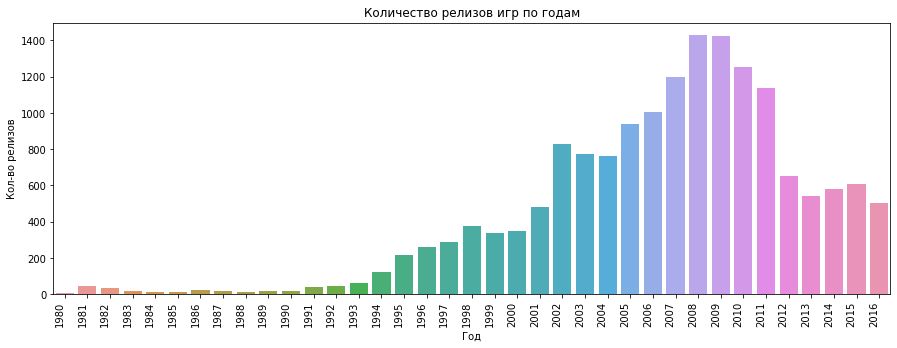

In [13]:
annual_releases = data.groupby('year_of_release')['name'].count().reset_index() # смотрим кол-во релизов по годам
annual_releases['share'] = annual_releases['name'] / annual_releases['name'].sum() # добавляем долю от общего кол-ва релизов
annual_releases # для наглядности строим столбчатую диаграмму распределения

plt.figure(figsize=(15, 5))
ax = sns.barplot(x='year_of_release',
            y='name',
            data=annual_releases)

ax.set_title('Количество релизов игр по годам')
ax.set(xlabel='Год', ylabel='Кол-во релизов')
plt.xticks(rotation=90, ha='right');


**Вывод:** Кол-ва релизов с 1980 по 1994 включительно составляли каждый год менее 1% от всего кол-ва релизов за 36 лет, поэтому данные за эти годы можно отбросить. С 1995 постепенный рост кол-ва релизов продолжался с промежуточными пиками в 98м, 2002м, пока не был достигнут основной, на данный момент пик в 2008 - 2009 годах, затем спад до 2013 года включительно, а после 13го пошел постепенный рост, 2016 некорректно учитывать, так как данные по нему неполные. Пока оставим для прогнозирования период в 21 год: с 1995 по 2015.

(Альтернативный вариант: рассматривать только 2013 - 2015гг)

**2. Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Попробуем выделить характерный срок появления новых и исчезновения старых платформ?**

,platform,total_sales
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12
15,PS,730.86
6,GBA,317.85


<AxesSubplot:xlabel='year_of_release'>

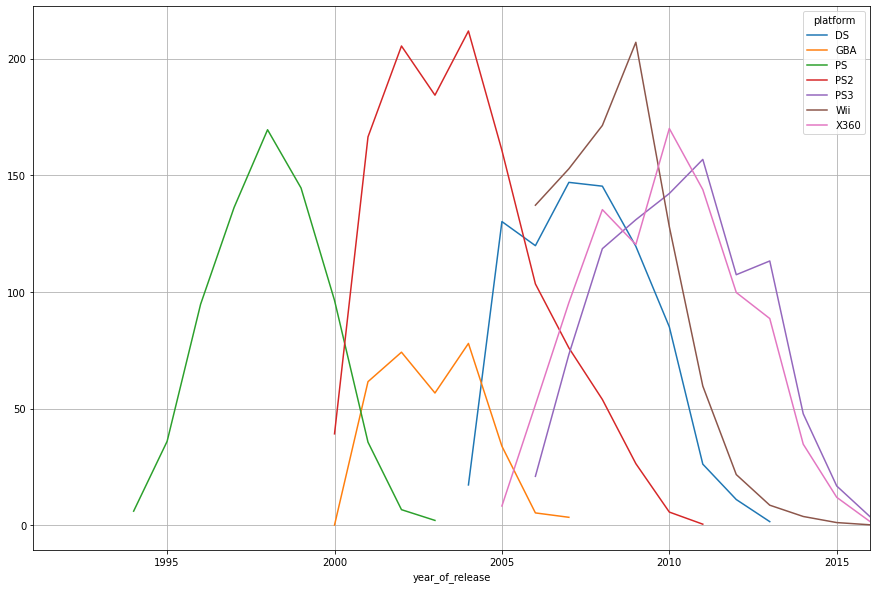

In [11]:
platform_sales = data.groupby('platform')['total_sales'].sum().reset_index() \
.sort_values('total_sales', axis=0, ascending=False) # группируем суммарные продажи по платформам

platform_sales_top7 = platform_sales.head(7) # выбираем 7 самых успешных
platform_sales_top7
platform_sales_top7_series = platform_sales_top7['platform'] # берем Series самых успешных

data_platform_sales_top7 = data.query('platform in @platform_sales_top7_series') # делаем срез данных по нему

data_platform_sales_top7 \
.pivot_table(index='year_of_release', values='total_sales', columns='platform', aggfunc='sum') \
.plot(grid=True, xlim=(1991, 2016), figsize=(15, 10)) # делаем сводную таблицу с суммами продаж по годам по платформам и сравниваем на одном графике
plt.show()

**Вывод:** С 1995 по 2005 год включительно новые платформы появлялись примерно каждые 5 лет, в 2010 же ничего такого же успешного по продажам в мире не появилось. Жизненный цикл успешных платформ (в плане значимых объемов продаж игр) составляет от 4-11 лет, в основном около 10 лет (если же брать медиану по всем платформам, то это 7 лет, см. ниже). На этом графике также видно, что данные до 1995 года представляют мало интереса в плане значимых объемов продаж (а не только кол-ва релизов).
Также наблюдаем, что "большие игроки" запущенные на рынок в районе 2005г. уже прошли свои пики в районе +/- 2010г. и либо ушли с рынка вообще, либо стремительно к этому идут. В то же время после 2010 есть минимум 1 новый относительно успешный игрок (PS4), идущий на подъем (падение после 2015 может быть обусловлено неполными данными за 2016, так как много продаж может быть в конце года перед Рождеством и новогодними праздниками).

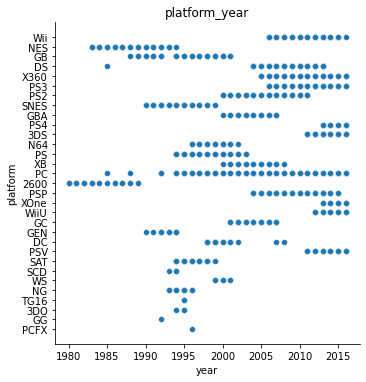

In [13]:
sns.relplot(data = data[data['year_of_release'] != 0],y = 'platform',x = 'year_of_release');
plt.title('platform_year');
plt.xlabel('year');
plt.ylabel('platform');

<Figure size 1440x1080 with 0 Axes>

<AxesSubplot:xlabel='platform', ylabel='year_of_release'>

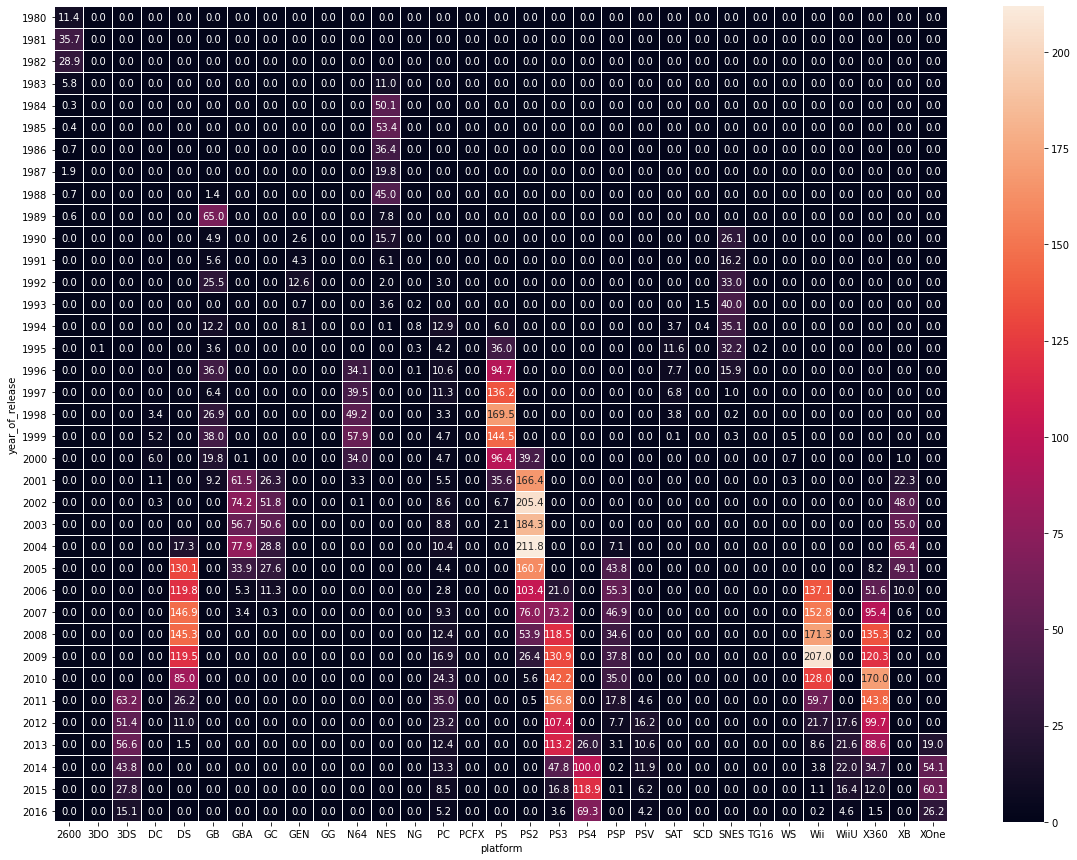

In [18]:
platform_avg_lifetime = data \
.pivot_table(index='year_of_release', values='total_sales', columns='platform', aggfunc='sum').fillna(0)

plt.figure(figsize=(20,15))
sns.heatmap(platform_avg_lifetime, annot=True, fmt=".1f", linewidths=.01)
plt.show()

In [19]:
from statistics import median

platform_lifetime = []
for column in platform_avg_lifetime.columns:
    platform_lifetime.append(len(platform_avg_lifetime[platform_avg_lifetime[column] > 0]))
 
platforms_avg_lifetime_value = median(platform_lifetime) 

print('Средний жизненный цикл игровых платформ:', platforms_avg_lifetime_value, 'лет')


Средний жизненный цикл игровых платформ: 7 лет


**3. Возьмем данные за соответствующий актуальный период. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не будем учитывать данные за предыдущие годы.**

In [20]:
actual_period_data = data[data['year_of_release'] > 2013].copy() # откорректировано после комментария ревьюера 
actual_period_data # берем срез данных за неполных 3 года: с 2014 по 2016, так как платформы за несколько лет "отживают свой век",
                   # а нам для прогноза на 2017 нужны данные максимально близкие к нему и актуальные в плане технологий и трендов

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


**4. Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.
Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.**

Топ 5 платформ по суммарным продажам за актуальный период:


,platform,total_sales,share%
3,PS4,288.15,39.50
9,XOne,140.36,19.24
0,3DS,86.68,11.88
2,PS3,68.18,9.35
8,X360,48.22,6.61


<AxesSubplot:xlabel='year_of_release'>

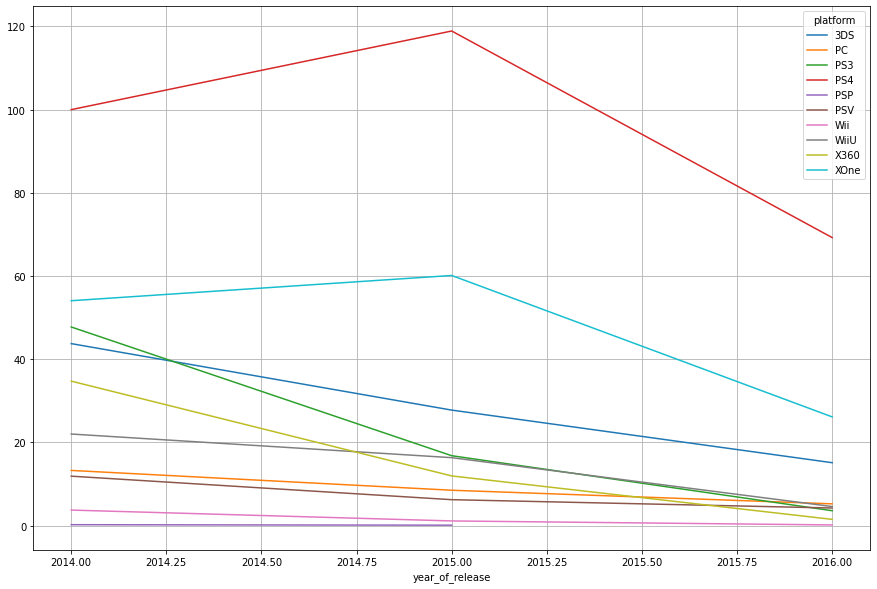

In [23]:
actual_period_platform_sales = actual_period_data.groupby('platform')['total_sales'].sum().reset_index() \
.sort_values('total_sales', axis=0, ascending=False) # группируем продажи по платформам
actual_period_platform_sales['share%'] = round(actual_period_platform_sales['total_sales'] \
/ actual_period_platform_sales['total_sales'].sum() * 100, 2) # добавляем долю от общих продаж в %

print('Топ 5 платформ по суммарным продажам за актуальный период:') # Поправил формулировку после комментария ревьюера
platform_top_5 = actual_period_platform_sales.head(5).copy() # выводим 5ку лучших
platform_top_5

actual_period_data \
.pivot_table(index='year_of_release', values='total_sales', columns='platform', aggfunc='sum') \
.plot(grid=True, figsize=(15, 10)) # строим график  динамики продаж по топ5 платфор в выбранном периоде

**Промежуточный вывод:** С существенным отрывом по суммарным продажам за данный период лидирует PS4 (доля - 40%), в 2 раза отстает XOne (почти 20%), замыкают 5ку лучших 3DS (12%), PS3(9%) и X360(7%). Однако более старые консоли из списка идут на спад продаж, поэтому рекомендовать их, как потенциально прибыльные затруднительно. Тем временем 2 новичка 2013 года идут в рост до 2015 (падение в 2016 может быть следствием неполных данных, идеально было бы сравнить помесячные продажи за 2015 и 2016, но, к сожалению, у нас нет таких данных) - это японская PS4 и американский XOne. В сочетании с с суммарной долей продаж в 60% и отсутствием более свежих релизов оставляем эти 2 консоли, как потенциально прибыльные на 2017 год.

<Figure size 1440x720 with 0 Axes>

<AxesSubplot:xlabel='total_sales', ylabel='platform'>

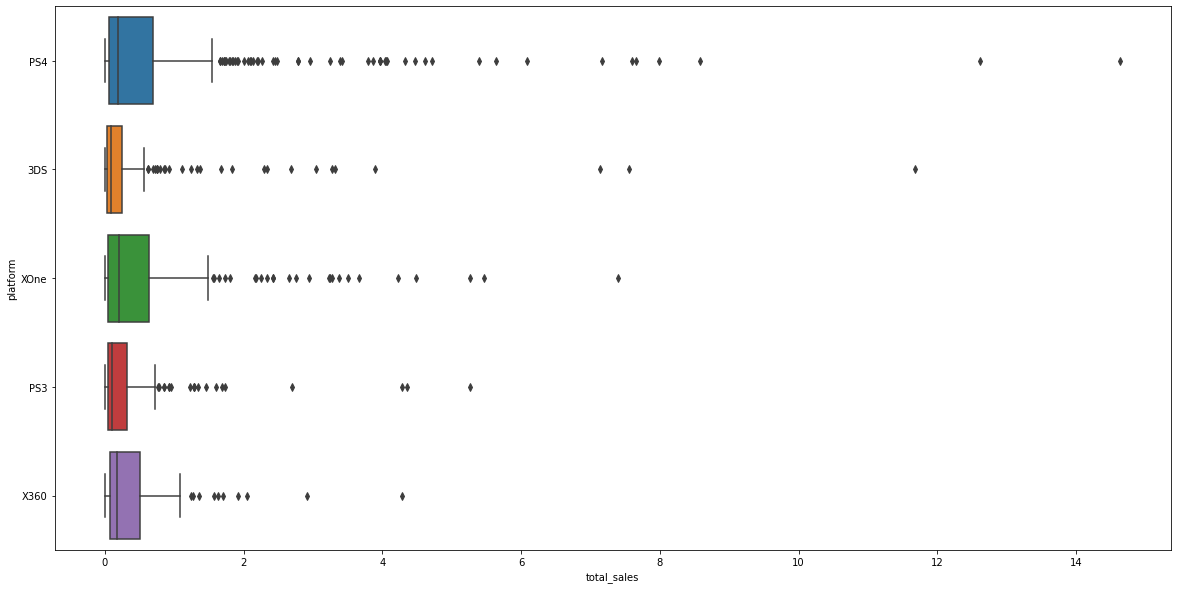

,platform,total_sales,share%
3,PS4,288.15,39.50
9,XOne,140.36,19.24
0,3DS,86.68,11.88
2,PS3,68.18,9.35
8,X360,48.22,6.61


<Figure size 1440x720 with 0 Axes>

(0.0, 0.8)

<AxesSubplot:xlabel='total_sales', ylabel='platform'>

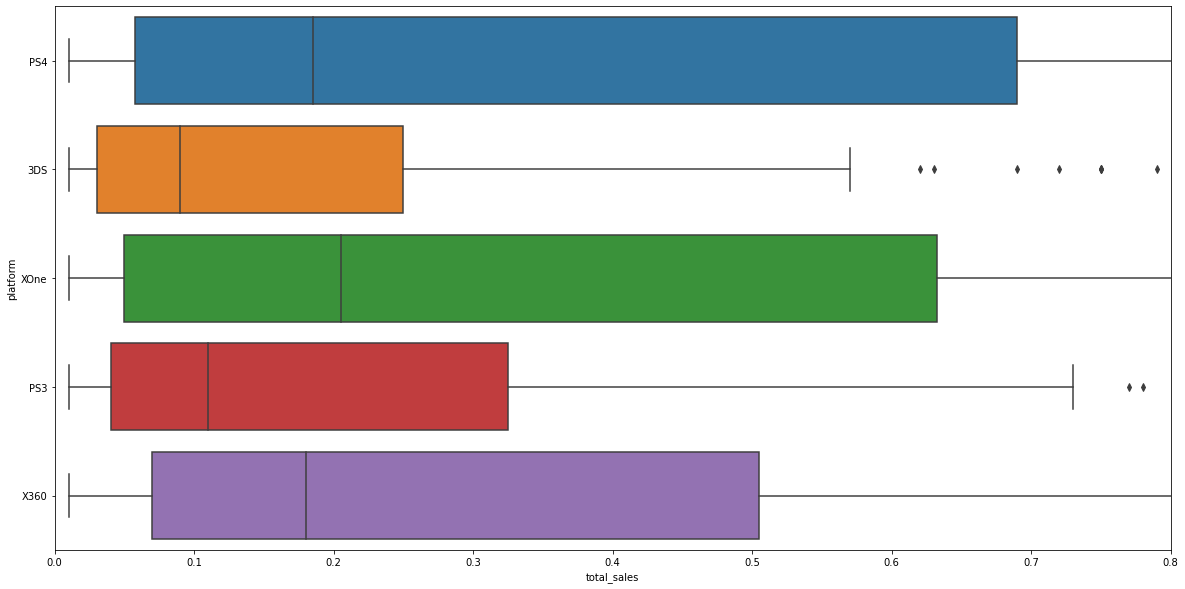

In [25]:
platform_top_5_series = platform_top_5['platform'] # берем Series самых успешных

actual_data_platform_sales_top5 = actual_period_data.query('platform in @platform_top_5_series') # делаем срез данных

plt.figure(figsize=(20,10));
sns.boxplot(y='platform', x='total_sales', data=actual_data_platform_sales_top5, orient="h"); # строим "ящики с усами"
plt.show()  

platform_top_5 # еще раз выведем топ5 для соотнесения с суммарными продажами

plt.figure(figsize=(20,10));
plt.xlim(0, 0.8);
sns.boxplot(y='platform', x='total_sales', data=actual_data_platform_sales_top5, orient="h"); # строим "ящики с усами"
plt.show()

**Вывод:** Медианы по всем платформам смещены влево, то есть несмотря на большее значение среднего арифметического их продаж, основной объем значений сконцентрирован ближе к невысоким значениям По суммарным объемам продаж PS3 и 3DS имеют сопоставимые значения, а X360 вообще замыкает 5ку с объемами в 1.5 - 2 раза ниже (см. таблицу выше), однако 75% значений по продажам у 3DS лежит до 250 тыс. проданных копий, в то время, как у PS3 уже где-то до 329 тыс. копий, а у Х360 чуть выше 500тыс. При этом менее 25% релизов на X360 опускаются ниже примерно 70 тыс. копий, а для 3DS и PS3 эта граница уже 40-50 тыс копий (т.е. в 1.5 - 2 раза ниже), что говорит о том, что в большей массе и по всему миру игры для 3DS продаются меньшими объемами, чем на PS3 и Х360. Общий же объем продаж дополняет большое кол-во выбросов - отдельных очень популярных игр - это хорошо видно по разбросу и концентрациям выбросов на укрупненном графике. Получается 3DS бьет по продажам PS3, а PS3 X360 за счет отдельных мегапопулярных тайтлов (возможно в каких-то отдельных жанрах и/или регионах, это мы изучим подробнее дальше). 

Если же сравнивать лидеров, то если у XOne медиана проданных копий лежит чуть правее 200 тыс., а у PS4 она чуть левее этого же значения.  Первые квартили лежат чуть правее 50тыс. копий, но у Sony немного правее. При этом 3 квартиль у XOne в районе 640тыс. копий, тогда как у PS4 в районе 700тыс. В целом ящики сопоставимы, а по суммарным объемам продаж PS4 бьет XOne в 2 раза в большей степени за счет превосходящего кол-ва отдельных очень популярных тайтлов - это так же хорошо видно на первом графике, куда полностью вошли выбросы.

**5. Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Соотнесем выводы с продажами игр на других платформах.**

Корреляция между оценками критиков и продажами игр на PS4: 0.4


<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

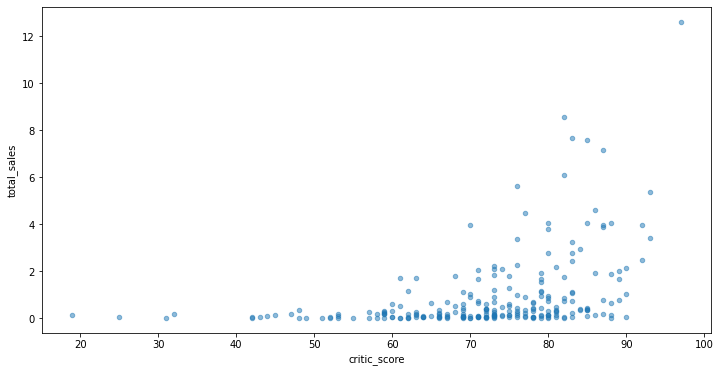

Корреляция между оценками пользователей и продажами игр на PS4: -0.04


<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

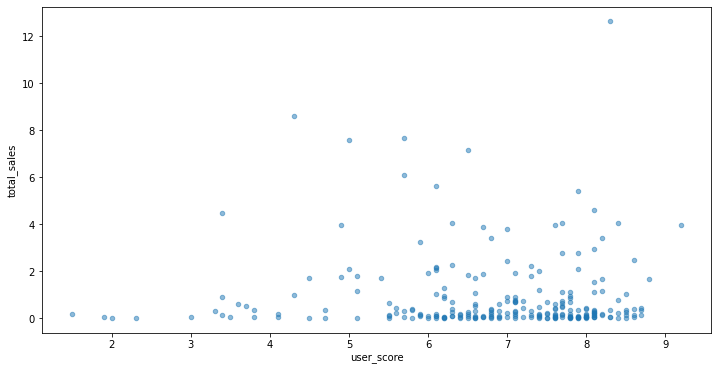

In [26]:
actual_data_ps4 = actual_period_data.query('platform == "PS4" and user_score != -0.1').copy() # берем срез данных 
                                                                                    #по популярной платформе PS4
top5_critic_score_corr = []

critic_score_corr_ps4 = actual_data_ps4['critic_score'].corr(actual_data_ps4['total_sales']) # считаем и выводим корреляцию
print('Корреляция между оценками критиков и продажами игр на PS4: {:.2}'.format(critic_score_corr_ps4)) # оценок и продаж

top5_critic_score_corr.append(critic_score_corr_ps4)

# строим диаграмму рассеяния продаж относительно оценок критиков
actual_data_ps4.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5, figsize=(12, 6));
plt.show()

top5_user_score_corr = []

user_score_corr_ps4 = actual_data_ps4['user_score'].corr(actual_data_ps4['total_sales']) # считаем и выводим корреляцию
print('Корреляция между оценками пользователей и продажами игр на PS4: {:.2}'.format(user_score_corr_ps4)) # оценок и продаж

top5_user_score_corr.append(user_score_corr_ps4)

# строим диаграмму рассеяния продаж относительно оценок пользователей
actual_data_ps4.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5, figsize=(12, 6));
plt.show()

**Промежуточный вывод:** Степень линейной взаимосвязи продаж игр на PS4 с оценками пользователей можно охарактеризовать, как отрицательную (то есть эффект даже немного обратный) и очень слабую, даже близкую к нулю (-0.04), то есть она либо отсутствует, либо очень минимальна. А связь от оценок критиков можно охарактеризовать, как просто слабую, но положительную (0.4). Если же сравнивать между собой, то оценки критиков имеют в 10 раз большю ЛИНЕЙНУЮ связь с продажами. Что, в целом, логично. Это все говорит только о линейных связях, могут быть еще не линейные. По крайней мере на диаграмме рассеяния с оценками профи мы не наблюдаем точек в левой верхней части (то есть нет таких игр, где были бы высокие продажи при совсем низких оченках критиков, в случае же с оценками пользователей, такие точки видны, хоть их и не много (то ли "сколько людей - столько мнений", то ли какие то случайные оценки - в любом случае, у профи всё упорядоченнее). Возможно наличие нелинейной связи данных. При оценках критиков выше 60-70 наблюдаются скопления точек с более высокими продажами, а самые высокие соответствуют максимальным уровням оценки. Однако это не позволяет говорить о каких-либо причинно-следственных связях.

На обоих диаграммах рассеяния видим, что значения, близкие у нулю по оси Х практически отсутствуют, воспользуемся этим и для успокоения души посмотрим, как распределяются продажи игр с пропусками в столбцах с оценками, уж очень их много. Заменим пропуски на значение 0, это распределение будет хорошо видно, не смешанное с другими точками. Проверим гипотезу о том, что возможно и продажи у таких игр стремятся к 0.

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

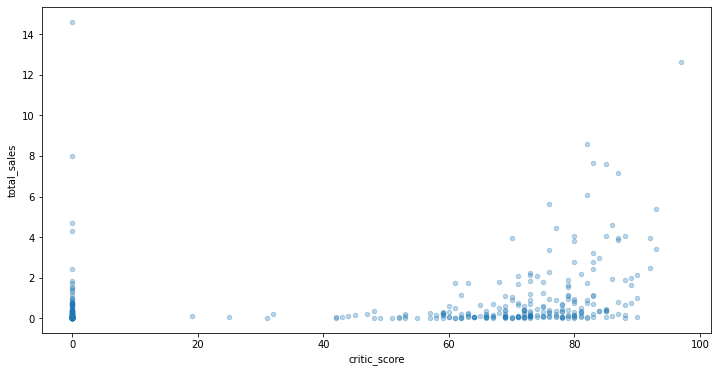

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

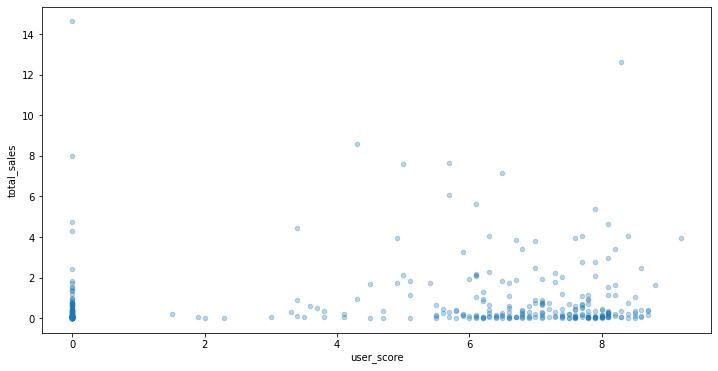

In [28]:
actual_data_ps4['critic_score'] = actual_data_ps4['critic_score'].fillna(0) # меняем пропуски в оценках критиков на 0
actual_data_ps4['user_score'] = actual_data_ps4['user_score'].fillna(0) # меняем пропуски в оценках пользователей на 0
# строим диаграммы рассеяния продаж относительно оценок критиков и пользователей соответственно
actual_data_ps4.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(12, 6));
plt.show()
actual_data_ps4.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(12, 6));
plt.show()

**Вывод:** Гипотеза не получила подкрепления на диаграмме: игры с пропусками в оценках имеют продажи, в том числе и высокого уровня. В любом случае, в рамках учебного проекта нам не узнать, что скрывается за пропусками, а линейные зависимости мы изучили по имеющимся данным.

Корреляция между оценками критиков и продажами игр на XOne: 0.42


<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

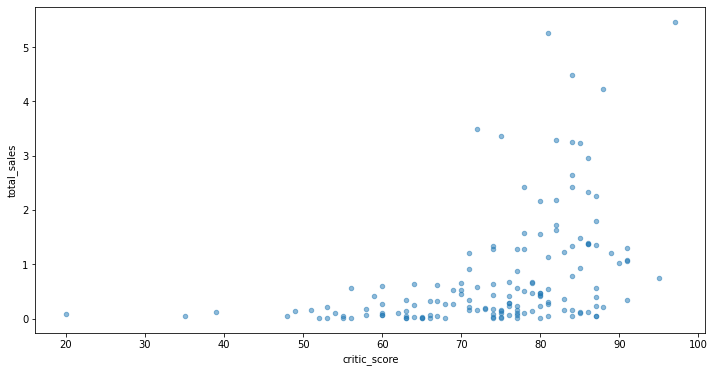

Корреляция между оценками пользователей и продажами игр на XOne: -0.07


<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

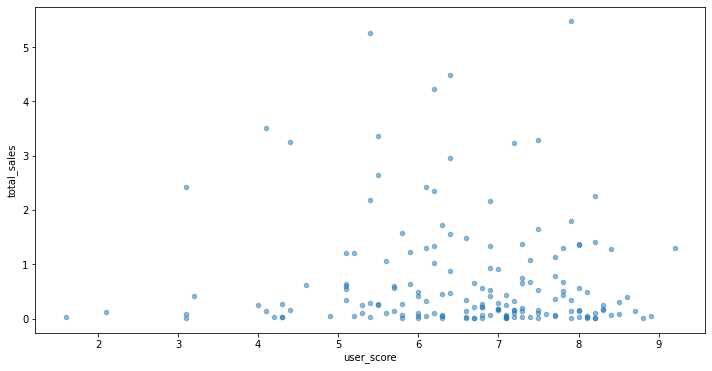

In [29]:
actual_data_xone = actual_period_data.query('platform == "XOne" and user_score != -0.1').copy() # берем срез данных 
                                                                                    #по популярной платформе XOne

critic_score_corr_xone = actual_data_xone['critic_score'].corr(actual_data_xone['total_sales']) # считаем и выводим корреляцию
print('Корреляция между оценками критиков и продажами игр на XOne: {:.2}'.format(critic_score_corr_xone)) # оценок и продаж

top5_critic_score_corr.append(critic_score_corr_xone)

# строим диаграмму рассеяния продаж относительно оценок критиков
actual_data_xone.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5, figsize=(12, 6));
plt.show()

user_score_corr_xone = actual_data_xone['user_score'].corr(actual_data_xone['total_sales']) # считаем и выводим корреляцию
print('Корреляция между оценками пользователей и продажами игр на XOne: {:.2}'.format(user_score_corr_xone)) # оценок и продаж

top5_user_score_corr.append(user_score_corr_xone)

# строим диаграмму рассеяния продаж относительно оценок пользователей
actual_data_xone.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5, figsize=(12, 6));
plt.show()

Корреляция между оценками критиков и продажами игр на 3DS: 0.28


<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

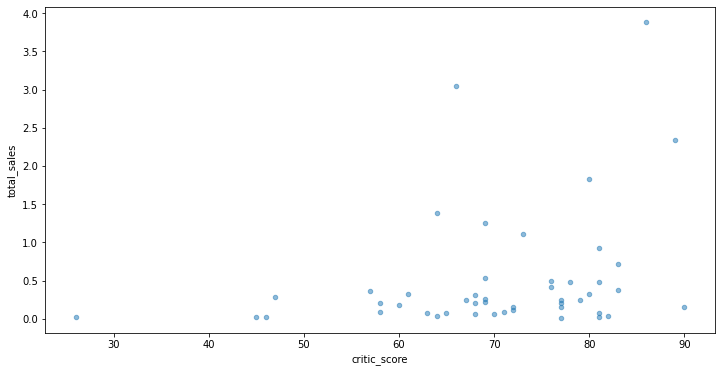

Корреляция между оценками пользователей и продажами игр на 3DS: 0.22


<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

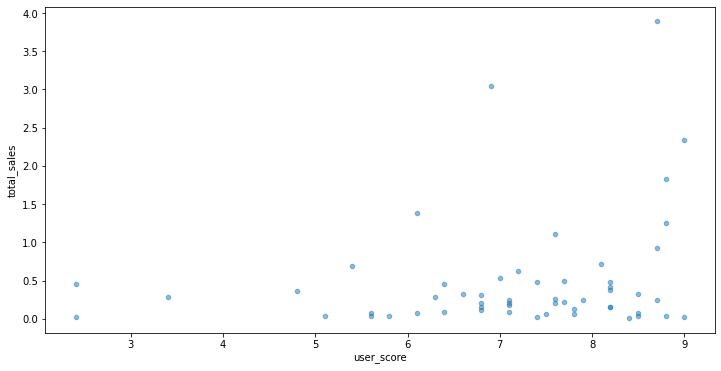

In [30]:
actual_data_3ds = actual_period_data.query('platform == "3DS" and user_score != -0.1').copy() # берем срез данных 
                                                                                    #по популярной платформе 3DS

critic_score_corr_3ds = actual_data_3ds['critic_score'].corr(actual_data_3ds['total_sales']) # считаем и выводим корреляцию
print('Корреляция между оценками критиков и продажами игр на 3DS: {:.2}'.format(critic_score_corr_3ds)) # оценок и продаж

top5_critic_score_corr.append(critic_score_corr_3ds)

# строим диаграмму рассеяния продаж относительно оценок критиков
actual_data_3ds.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5, figsize=(12, 6));
plt.show()

user_score_corr_3ds = actual_data_3ds['user_score'].corr(actual_data_3ds['total_sales']) # считаем и выводим корреляцию
print('Корреляция между оценками пользователей и продажами игр на 3DS: {:.2}'.format(user_score_corr_3ds)) # оценок и продаж

top5_user_score_corr.append(user_score_corr_3ds)

# строим диаграмму рассеяния продаж относительно оценок пользователей
actual_data_3ds.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5, figsize=(12, 6));
plt.show()

Корреляция между оценками критиков и продажами игр на PS3: 0.45


<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

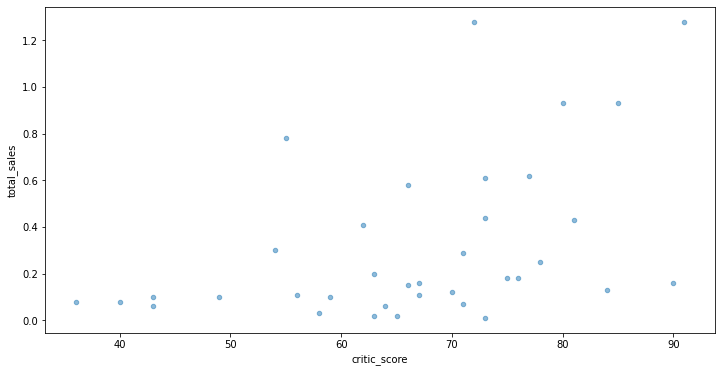

Корреляция между оценками пользователей и продажами игр на PS3: -0.17


<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

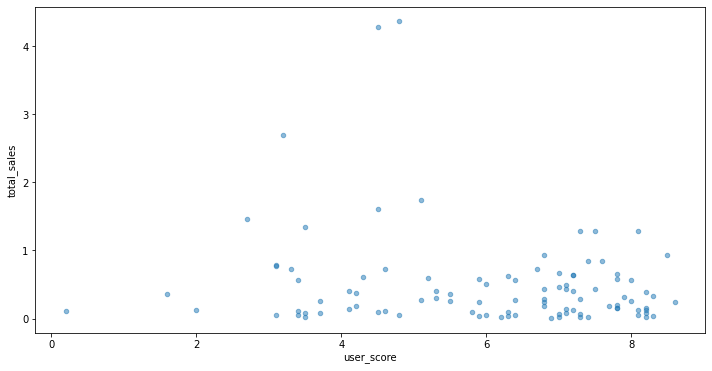

In [31]:
actual_data_ps3 = actual_period_data.query('platform == "PS3" and user_score != -0.1').copy() # берем срез данных 
                                                                                    #по популярной платформе PS3

critic_score_corr_ps3 = actual_data_ps3['critic_score'].corr(actual_data_ps3['total_sales']) # считаем и выводим корреляцию
print('Корреляция между оценками критиков и продажами игр на PS3: {:.2}'.format(critic_score_corr_ps3)) # оценок и продаж

top5_critic_score_corr.append(critic_score_corr_ps3)

# строим диаграмму рассеяния продаж относительно оценок критиков
actual_data_ps3.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5, figsize=(12, 6));
plt.show()

user_score_corr_ps3 = actual_data_ps3['user_score'].corr(actual_data_ps3['total_sales']) # считаем и выводим корреляцию
print('Корреляция между оценками пользователей и продажами игр на PS3: {:.2}'.format(user_score_corr_ps3)) # оценок и продаж

top5_user_score_corr.append(user_score_corr_ps3)

# строим диаграмму рассеяния продаж относительно оценок пользователей
actual_data_ps3.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5, figsize=(12, 6));
plt.show()

Корреляция между оценками критиков и продажами игр на X360: 0.53


<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

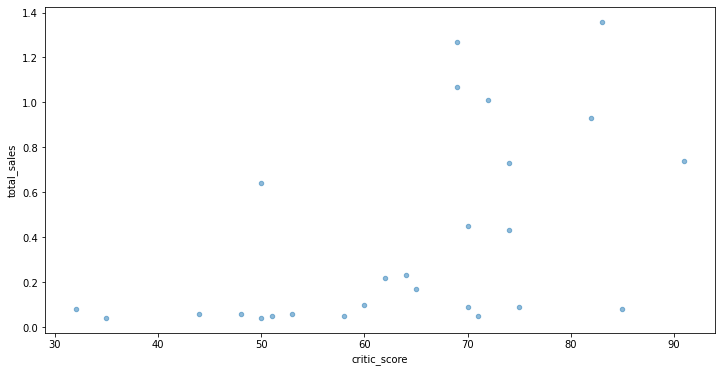

Корреляция между оценками пользователей и продажами игр на X360: -0.14


<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

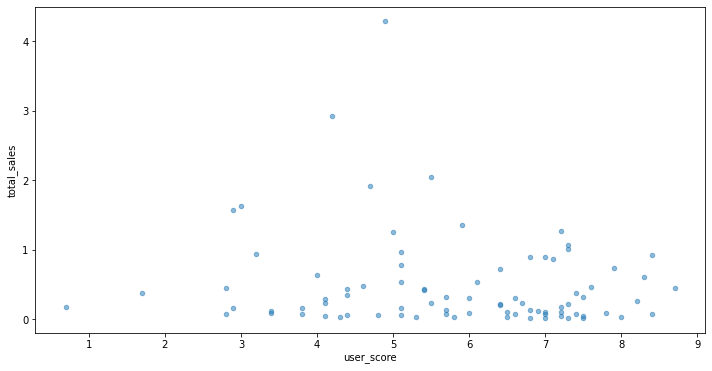

In [32]:
actual_data_x360 = actual_period_data.query('platform == "X360" and user_score != -0.1').copy() # берем срез данных 
                                                                                    #по популярной платформе X360

critic_score_corr_x360 = actual_data_x360['critic_score'].corr(actual_data_x360['total_sales']) # считаем и выводим корреляцию
print('Корреляция между оценками критиков и продажами игр на X360: {:.2}'.format(critic_score_corr_x360)) # оценок и продаж

top5_critic_score_corr.append(critic_score_corr_x360)

# строим диаграмму рассеяния продаж относительно оценок критиков
actual_data_x360.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5, figsize=(12, 6));
plt.show()

user_score_corr_x360 = actual_data_x360['user_score'].corr(actual_data_x360['total_sales']) # считаем и выводим корреляцию
print('Корреляция между оценками пользователей и продажами игр на X360: {:.2}'.format(user_score_corr_x360)) # оценок и продаж

top5_user_score_corr.append(user_score_corr_x360)

# строим диаграмму рассеяния продаж относительно оценок пользователей
actual_data_x360.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5, figsize=(12, 6));
plt.show()

In [33]:
platform_top_5['critic_score_corr'] = top5_critic_score_corr
platform_top_5['user_score_corr'] = top5_user_score_corr
platform_top_5

actual_data_all = actual_period_data.query('user_score != -0.1').copy() # берем срез данных 
                                                                        #по всем платформам

,platform,total_sales,share%,critic_score_corr,user_score_corr
3,PS4,288.15,39.50,0.402498,-0.040132
9,XOne,140.36,19.24,0.424101,-0.070384
0,3DS,86.68,11.88,0.284686,0.215193
2,PS3,68.18,9.35,0.446575,-0.166761
8,X360,48.22,6.61,0.525723,-0.138445


**Вывод:** Большинство остальных платформ в топ5 по данным корреляции оценок критиков и пользователей с суммарными продажами по миру сопоставимы с PS4, разве что X360 выделилась коэф. корреляции даже выше 0.5 в случае с оценками критиков. Однако более значимо отличились данные по 3DS, где оба коэффициента получились положительными и близких значений: 0.28 и 0.22, что говорит о слабости связи, но тем не менее о наличии, хоть и слабой, но положительной линейной связи продаж и оценок пользователей. Хоть о наличии причинно-следственной связи говорить нельзя, но стоит отметить по графикам, что при оценках критиков в районе 70 и выше начинают активнее наблюдаться и более высокие объемы продаж. Кто здесь "курица", а кто "яйцо" - это уже вопрос более сложный.

**6. Общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

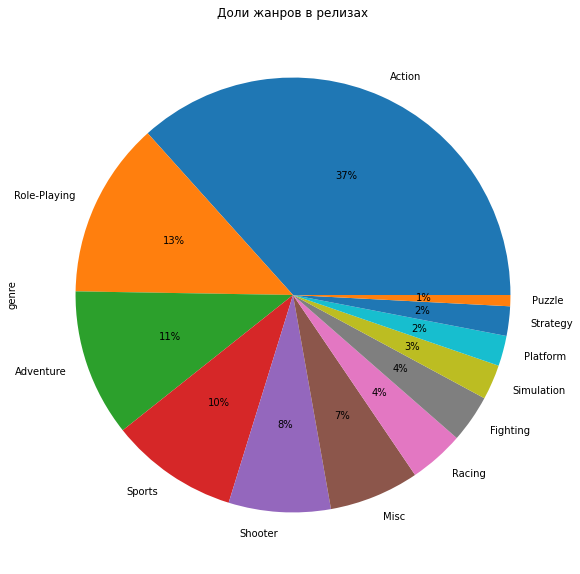

In [34]:
actual_period_data['genre'].value_counts() # считаем релизы по жанрам игр
plt.figure(figsize=(10,10)) # задаем размер фигуры
actual_period_data['genre'].value_counts().plot(kind='pie', autopct='%1.0f%%', title='Доли жанров в релизах'); 
# строим круговую диаграму, чтобы лучше показать доли жанров в релизах

In [35]:
genre_release_share_actual_data = actual_period_data['genre'].value_counts(normalize=True).reset_index() # считаем релизы по жанрам
genre_release_share_actual_data.columns = ['genre', 'release_share'] # в долях, сбрасываем индекс и задаем привычные имена столбцам
genre_release_share_actual_data # смотрим, в каком порядке идут жанры по убыванию доли релизов

sales_by_genre_actual_data = actual_period_data.groupby('genre')['total_sales'].sum().reset_index() \
.sort_values('total_sales', axis=0, ascending=False) # группируем продажи по жанрам
sales_by_genre_actual_data['sales_share'] = sales_by_genre_actual_data['total_sales'] \
/ sales_by_genre_actual_data['total_sales'].sum() # добавляем столбец с долями продаж
sales_by_genre_actual_data = sales_by_genre_actual_data.merge(genre_release_share_actual_data) # добавляем столбец с долями релизов по жанрам, чтобы сравнить
                                                              # в соотношении с долями по продажам 


,genre,release_share
0,Action,0.366489
1,Role-Playing,0.130847
2,Adventure,0.109532
3,Sports,0.095323
4,Shooter,0.075784
5,Misc,0.066903
6,Racing,0.040853
7,Fighting,0.035524
8,Simulation,0.026051
9,Platform,0.022499


<AxesSubplot:title={'center':'Доли жанров в продажах'}, ylabel='total_sales'>

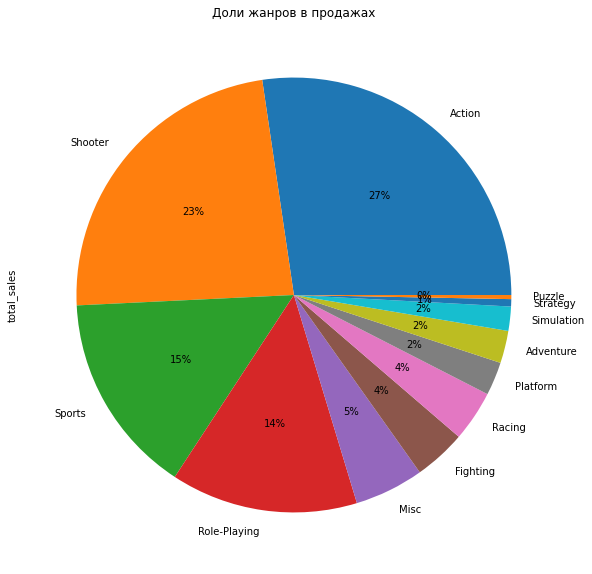

,genre,mean_sales
0,Shooter,1.34
1,Sports,0.68
2,Platform,0.48
3,Fighting,0.47
4,Role-Playing,0.46
5,Racing,0.40
6,Misc,0.33
7,Action,0.32
8,Simulation,0.30
9,Puzzle,0.16


,genre,total_sales,sales_share,release_share,mean_sales,avg_titles
0,Action,199.36,0.273302,0.366489,0.32,623
1,Shooter,170.94,0.234341,0.075784,1.34,128
2,Sports,109.48,0.150086,0.095323,0.68,161
3,Role-Playing,101.44,0.139064,0.130847,0.46,221
4,Misc,37.55,0.051477,0.066903,0.33,114
5,Fighting,28.22,0.038687,0.035524,0.47,60
6,Racing,27.52,0.037727,0.040853,0.40,69
7,Platform,18.09,0.024800,0.022499,0.48,38
8,Adventure,17.55,0.024059,0.109532,0.09,195
9,Simulation,13.13,0.018000,0.026051,0.30,44


In [36]:
actual_period_data.groupby('genre')['total_sales'].sum().sort_values(ascending=False) \
.plot(y='total_sales', kind='pie', autopct='%1.0f%%', title='Доли жанров в продажах', figsize=(10,10)); 
plt.show() # строим круговую диаграму, чтобы лучше показать доли жанров в продажах

genre_mean_sales_actual_period = round(actual_period_data.groupby('genre')['total_sales'].mean() \
.sort_values(ascending=False).reset_index(), 2) # посмотрим средние объемы продаж в этом жанре

genre_mean_sales_actual_period.columns = ['genre', 'mean_sales'] # переименуем столбцы для более удобного объединения

genre_mean_sales_actual_period

sales_by_genre_actual_data = sales_by_genre_actual_data.merge(genre_mean_sales_actual_period)

sales_by_genre_actual_data['avg_titles'] = round(sales_by_genre_actual_data['total_sales'] / \
sales_by_genre_actual_data['mean_sales']).astype(int)

sales_by_genre_actual_data

**Вывод:** Жанр "Action" первый, как по кол-ву релизов (37%), так и по суммарным объемам продаж в мире (27%), однако средний объем продаж по нему ниже, чем у более половины списка жанров. То есть общий объем достигается большим ко-вом отдельных тайтлов с маленькими объемами (для наглядности я посчитал столбец с примерным кол-вом игр, которое должно было выйти за данный период со средним объемом продаж, чтобы выйти на суммарный уровень периода). Далее в четверке самых продаваемых по порядку "Shooter" (23%, но при этом всего 8% от релизов, т.е. "шутанов" из обще массы релизов выходит не так много, зато разлетаются они ббольшими партиями, точнее самыми большими - средний объем 1.34млн.копий - самый высокий), "Sports" (15%, от всех релизов чуть меньше 10%, но средний объем продаж на 2м месте после шутеров) и "RPG" (14%, но уже 13% от всех релизов, правда средние продажи на 5м месте, уступая немного платформерам и файтингам). 
    
Если мы занимаемся продажей отдельных тайтлов, то правильнее прогнозировать прибыльность на средних продажах внутри жанра. Поэтому более прибыльными назовем верхнюю половину таблицы со средними продажами внутри жанра, это Shooter, Sports, Platform, Fighting, Role-Playing и Racing соответственно.
    
Подсветим дополнительно продажи по жанрам еще и в разрезе различных платформ, возможно это поможет лучше понять распределения на ящиках с усами, что мы построили ранее для популярных платформ.

<Figure size 720x504 with 0 Axes>

<AxesSubplot:xlabel='genre', ylabel='platform'>

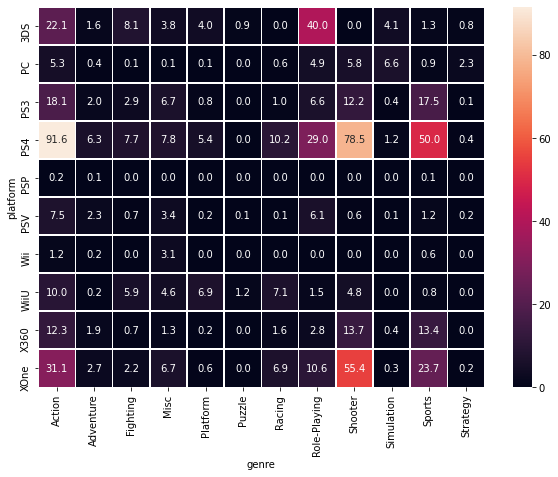

In [37]:
platform_genre_sales = actual_period_data.pivot_table(
                        index='platform', 
                        columns='genre', 
                        values='total_sales', 
                        aggfunc=sum).fillna(0)
plt.figure(figsize=(10,7))
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5)  

**Вывод:** На этом графике хорошо прослеживается, как продажи игр на конретных платформах распределены по жанрам (грубо говоря: на каких жанрах зиждется успех тех или иных платформ). Здесь в дополнение к ящикам с усами, что мы строили ранее становится лучше видно, как 3DS делает суммарные продажи более сбалансированных, казалось бы, по жанрам PS3 и Х360 чуть ли не за счет одного киллер-жанра RPG, приправив немного экшеном и щепоткой файтингов (но тут сам формат платформы накладывает свои особенности). XOne продает больше всего копий шутеров, а PS4 помимо этого "make "Action" geat again" :), попутно не забывая делать хорошие продажи в спорте и RPG (привет родной Японии).  

### Шаг 4. Портрет пользователя каждого региона

**Определим для пользователя каждого региона (NA, EU, JP):**

**1. Самые популярные платформы (топ-5). Рассмотрим различия в долях продаж.**

In [38]:
na_platform_sales_actual_period = actual_period_data.groupby('platform')['na_sales'].sum().reset_index() \
.sort_values('na_sales', axis=0, ascending=False) # группируем региональные продажи по платформам
na_platform_sales_actual_period['share%'] = round(na_platform_sales_actual_period['na_sales'] \
/ na_platform_sales_actual_period['na_sales'].sum() * 100, 2) # добавляем столбец с долей продаж в %

na_platform_sales_top5 = na_platform_sales_actual_period.head(5) # выбираем 5 самых успешных
na_platform_sales_top5

eu_platform_sales_actual_period = actual_period_data.groupby('platform')['eu_sales'].sum().reset_index() \
.sort_values('eu_sales', axis=0, ascending=False) # группируем региональные продажи по платформам
eu_platform_sales_actual_period['share%'] = round(eu_platform_sales_actual_period['eu_sales'] \
/ eu_platform_sales_actual_period['eu_sales'].sum() * 100, 2) # добавляем столбец с долей продаж в %

eu_platform_sales_top5 = eu_platform_sales_actual_period.head(5) # выбираем 5 самых успешных
eu_platform_sales_top5

jp_platform_sales_actual_period = actual_period_data.groupby('platform')['jp_sales'].sum().reset_index() \
.sort_values('jp_sales', axis=0, ascending=False) # группируем региональные продажи по платформам
jp_platform_sales_actual_period['share%'] = round(jp_platform_sales_actual_period['jp_sales'] \
/ jp_platform_sales_actual_period['jp_sales'].sum() * 100, 2) # добавляем столбец с долей продаж в %

jp_platform_sales_top5 = jp_platform_sales_actual_period.head(5) # выбираем 5 самых успешных
jp_platform_sales_top5

,platform,na_sales,share%
3,PS4,98.61,34.71
9,XOne,81.27,28.61
8,X360,28.30,9.96
0,3DS,22.64,7.97
2,PS3,22.05,7.76


,platform,eu_sales,share%
3,PS4,130.04,48.04
9,XOne,46.25,17.09
2,PS3,25.54,9.44
1,PC,17.97,6.64
0,3DS,16.12,5.96


,platform,jp_sales,share%
0,3DS,44.24,47.52
3,PS4,15.02,16.13
5,PSV,14.54,15.62
2,PS3,11.22,12.05
7,WiiU,7.31,7.85


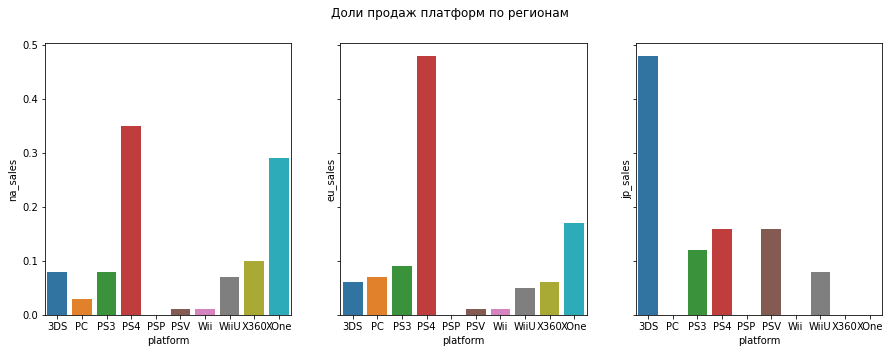

In [39]:
regional_platform_sales = actual_period_data.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].agg('sum') \
.apply(lambda x: round(x / float(x.sum()), 2)).reset_index()  # использовал предложенный ревьюером код с самописной функцией

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True);  # использовал subplots для отображения на "одном холсте"
fig.suptitle('Доли продаж платформ по регионам');   

# na
sns.barplot(ax=axes[0], x=regional_platform_sales['platform'], y=regional_platform_sales['na_sales']);

# eu
sns.barplot(ax=axes[1], x=regional_platform_sales['platform'], y=regional_platform_sales['eu_sales']);

# jp
sns.barplot(ax=axes[2], x=regional_platform_sales['platform'], y=regional_platform_sales['jp_sales']);

**Вывод:** В целом топ5 в США и Европе относительно схожи: на первом месте PS4, однако в Европе доля 4й 48% (почти половина рынка) со значимым отрывом, далее идет более чем в 2 раза отстающий XOne (почти 17%), PS3 (9%) и даже PC (7%), замыкает 5ку 3DS (6%). В США же отрыв PS4 (35%) от второго XOne (29%) не так велик, а третье место за X360 (10%), 3DS на 4м месте и замыкает PS3 (оба почти по 8%). 
    
Получается, что разница в том, что европейцы отдают больше предпочтения продуктам SONY и больше используют PC для игр, тогда как американцы патриотично предпочитают продукты Microsoft (PS4, видимо сильнее патриотизма, так как это последнее поколение и возможно на данный момент там больше интересных релизов и эксклюзивов). Портативный гейминг в этих регионах скорее нишевая тема, в отличие от гейминга в гостинной на большом экране (не менее 80% игр продаются на стационарные платформы).

В Японии же картинка сильно отличается от запада, что в целом характерно для Японии. Как раз на первом месте, занимая практически половину рынка (48%( стоит консоль от японской Nintendo. Следующие 3 места за японскими же SONY: причем новейшая PS4 лишь на "пол корпуса" опережает портативную (как и 3DS) PSVita - обе в районе 16% рынка. PS3 немного отстает с 12% на предпоследнем месте и замыкает 5ку лидеров портативная же WiiU от Nintendo по 8%. Делаем вывод, что японцы отдают предпочтение своим производителям, а главное у них сильно развита культура портативного гейминга - ок. 70% от рынка.
    
Если нужен универсальный вариант для всех регионов, то это PS4 на данный момент.

**2. Самые популярные жанры (топ-5).**

In [40]:
na_genre_sales_actual_period = actual_period_data.groupby('genre')['na_sales'].sum().reset_index() \
.sort_values('na_sales', axis=0, ascending=False) # группируем региональные продажи по жанрам
na_genre_sales_actual_period['share%'] = round(na_genre_sales_actual_period['na_sales'] \
/ na_genre_sales_actual_period['na_sales'].sum() * 100, 2) # добавляем столбец с долей продаж в %

na_genre_sales_top5 = na_genre_sales_actual_period.head(5) # выбираем 5 самых успешных
na_genre_sales_top5

eu_genre_sales_actual_period = actual_period_data.groupby('genre')['eu_sales'].sum().reset_index() \
.sort_values('eu_sales', axis=0, ascending=False) # группируем региональные продажи по жанрам
eu_genre_sales_actual_period['share%'] = round(eu_genre_sales_actual_period['eu_sales'] \
/ eu_genre_sales_actual_period['eu_sales'].sum() * 100, 2) # добавляем столбец с долей продаж в %

eu_genre_sales_top5 = eu_genre_sales_actual_period.head(5) # выбираем 5 самых успешных
eu_genre_sales_top5

jp_genre_sales_actual_period = actual_period_data.groupby('genre')['jp_sales'].sum().reset_index() \
.sort_values('jp_sales', axis=0, ascending=False) # группируем региональные продажи по жанрам
jp_genre_sales_actual_period['share%'] = round(jp_genre_sales_actual_period['jp_sales'] \
/ jp_genre_sales_actual_period['jp_sales'].sum() * 100, 2) # добавляем столбец с долей продаж в %

jp_genre_sales_top5 = jp_genre_sales_actual_period.head(5) # выбираем 5 самых успешных
jp_genre_sales_top5

,genre,na_sales,share%
8,Shooter,79.02,27.82
0,Action,72.53,25.53
10,Sports,46.13,16.24
7,Role-Playing,33.47,11.78
3,Misc,15.05,5.30


,genre,eu_sales,share%
0,Action,74.68,27.59
8,Shooter,65.52,24.21
10,Sports,45.73,16.89
7,Role-Playing,28.17,10.41
6,Racing,14.13,5.22


,genre,jp_sales,share%
7,Role-Playing,31.16,33.47
0,Action,29.58,31.78
2,Fighting,6.37,6.84
3,Misc,5.61,6.03
8,Shooter,4.87,5.23


**Вывод(подкорректирован в связи с изменением актуального временного периода после комментария ревьюера):** С жанрами еще более видна схожесть предпочтений западного потребителя (США и Европа), только поменяны местами 1 и 2 места и замыкающие разные: в США Shooter 28%, а Action 26%, в Европе Action 28%, а Shooter 25%. Далее в обоих регионах идет Sports (16-17%) - на третьем месте и RPG (порядка 10-12%) - на 4м. Замыкают 5-ку  с 5% прочее в штатах и Racing в Европе. 
    
Также вновь проявляется ощутимое отличие предпочтений потребителей в Японии: первое место - RPG (более 33%), второе место - Action (почти 32% - немного выше, чем в первых 2х регионах). Третье место - это Fighting с уже всего ок. 7% рынка, немного отстают на 4 месте прочие (ок 6%) и только на 5 месте - Shooter (5%), который занимает 1\4 рынка продаж в США и Европе. Спортивные симуляторы в тройке продаж с хорошей долей на западных рынках, но в Японии даже не входят в топ5, с другой стороны файтинги не входят в пятерку США и Европы. Предпочтения японцев по жанрам возможно отчасти проистекают из их предпочтений по консолям: на портативной платформе в шутеры менее удобно играть. 

Еcли нужно выбрать один жанр, одинаково популярный и на Западе и в Японии, то это будет Action.

**3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

In [41]:
actual_period_data['rating'] = actual_period_data['rating'].replace(
    {'RP': 'pending', 'E': '0+', 'K-A': '0+', 'EC': '3+', 'E10+': '10+', 'T': '13+', 'M': '17+', 'AO': '18+'}
)
actual_period_data['rating'] = actual_period_data['rating'].fillna('no_rating') # добавил после комментария ревбюера
actual_period_data['rating'].sort_values().unique() # для наглядности заменим коды рейтингов их возрастными ограничениями

array(['0+', '10+', '13+', '17+', 'no_rating'], dtype=object)

In [43]:
total_rating_sales_actual_period = actual_period_data.groupby('rating', dropna=False)['total_sales'].sum().reset_index() \
.sort_values('total_sales', axis=0, ascending=False) # группируем общие продажи по рейтингу
total_rating_sales_actual_period['share%'] = round(total_rating_sales_actual_period['total_sales'] \
/ total_rating_sales_actual_period['total_sales'].sum() * 100, 2) # добавляем столбец с долей продаж в %
total_rating_sales_actual_period

na_rating_sales_actual_period = actual_period_data.groupby('rating', dropna=False)['na_sales'].sum().reset_index() \
.sort_values('na_sales', axis=0, ascending=False) # группируем региональные продажи по рейтингу
na_rating_sales_actual_period['share%'] = round(na_rating_sales_actual_period['na_sales'] \
/ na_rating_sales_actual_period['na_sales'].sum() * 100, 2) # добавляем столбец с долей продаж в %
na_rating_sales_actual_period

eu_rating_sales_actual_period = actual_period_data.groupby('rating', dropna=False)['eu_sales'].sum().reset_index() \
.sort_values('eu_sales', axis=0, ascending=False) # группируем региональные продажи по рейтингу
eu_rating_sales_actual_period['share%'] = round(eu_rating_sales_actual_period['eu_sales'] \
/ eu_rating_sales_actual_period['eu_sales'].sum() * 100, 2) # добавляем столбец с долей продаж в %
eu_rating_sales_actual_period

jp_rating_sales_actual_period = actual_period_data.groupby('rating', dropna=False)['jp_sales'].sum().reset_index() \
.sort_values('jp_sales', axis=0, ascending=False) # группируем региональные продажи по рейтингу
jp_rating_sales_actual_period['share%'] = round(jp_rating_sales_actual_period['jp_sales'] \
/ jp_rating_sales_actual_period['jp_sales'].sum() * 100, 2) # добавляем столбец с долей продаж в %
jp_rating_sales_actual_period

,rating,total_sales,share%
3,17+,226.54,31.06
4,no_rating,198.97,27.28
0,0+,133.13,18.25
2,13+,99.13,13.59
1,10+,71.68,9.83


,rating,na_sales,share%
3,17+,96.42,33.94
4,no_rating,64.72,22.78
0,0+,50.74,17.86
2,13+,38.95,13.71
1,10+,33.23,11.70


,rating,eu_sales,share%
3,17+,93.44,34.52
4,no_rating,58.95,21.78
0,0+,58.06,21.45
2,13+,34.07,12.59
1,10+,26.16,9.66


,rating,jp_sales,share%
4,no_rating,56.90,61.12
2,13+,14.78,15.88
0,0+,8.94,9.60
3,17+,8.01,8.60
1,10+,4.46,4.79


**Вывод:** Любопытно, что из всего списка рейтингов в 2014-2016гг. остались представлены 4 (не считая значимой доли пропусков, они могут быть чем угодно, в том числе и отсутствием рейтинга). Также интересно, что нет игр с рейтингом AO (adults only = 18+), содержащим длительные сцены насилия, сексуального характера и т.п., возможно игроделы со временем как-то приспособились (ради увеличения аудитории) снижать рейтинг до хотя бы 17+ (скорее всего это менее болезненно бьет по сюжету, чем снижение рейтинга до 13+, так как 17+ также может содержать практически все те же сцены, что и 18+, но несколько в более легкой степени, так зачем же упускать дополнительные продажи?). Эти догадки, особенно по США и Европе косвенно подтверждаются тем, что игры с рейтингом 17+("M") в топе продаж в этих регионах (свыше 30%), а 13+ ("T") только на 3 месте (около 13%). На 2 месте (не считая пропусков) во всех 3 регионах идут игры для всех возрастов (0+ = E) с 18% в Америке, 21% в Европе и 10% в Японии. Замыкают рейтинг во всех 3 регионах игры с рейтингом 10+ (E10+): ок. 10% на Западе и 5% в Японии. В остальном же Япония, как и ранее, отличилась. Первое и третье места здесь идут наоборот: у рейтинга 13+ под 16% рынка, а у 17+ только 9% чуть меньше, чем у 0+. Отдельно следует сказать о пропусках, которые мы заменили значением "no_rating": на Западе они составляют 22-23% (больше доля только у лидера), а в Японии вообще составляют 61% игр (1 строчка). Скорее всего это связано с тем, что ESRB - это американский рейтинг, а у японцев свой путь и свои рейтинги, которые может быть и есть, но не представлены в данных.

Что можно сказать: на западе основные продажи опираются на игры с максимально взрослым содержанием в балансе с максимально возможной при этом аудиторией (это также перекликается с жанрами Action и особенно Shooter в топах продаж и преобладанием более дорогих и требующих большого экрана стационарных консолей), Японцы же больше дети по натуре и в топе у них игры с рейтингом 13+ (что тоже перекликается с первенством RPG в жанрах и портативным геймингом). 

Если же нужно выбрать рейтинг одинаково успешный для всех 3 регионов, то это 13+ и 0+ (игры для всех возрастов) и это не обязательно что-то совсем детское или обучающее, это может быть что-то легкое и мультяшное, но взрослые и большие компании тоже могут захотеть поиграть во что-то не слишком серьезное и сложное. Ну и очевидный плюс этой категории - максимально широкая аудитория. Кстати данный рейтинг вполне себе перекликается с играми в жанре "Action", который также универсален в разных регионах.

### Шаг 5. Проверка гипотез

Данные за актуальный период времени, что мы выбрали ранее - это уже небольшая часть изначального датасета. Для целей проверки гипотез по оценкам пользователей из них также следует удалить высокую долю пропусков и значений 'tbd' в этом столбце, замененных нами ранее на -0.1 (распределение которых относительно продаж мы также рассматривали ранее). Удаляя искуственно добавленные одинаковые значения -0.1 мы повышаем случайность выборки, а следовательно ее репрезентативность. С другой стороны еще сильнее уменьшаем сам размер выборки, так как потом из оставшегося датасета еще нужно взять срезы по отдельным платформам и жанрам, чтобы получить сравниваемые выборки.

In [44]:
sample_data = actual_period_data # определяем временной период, из которого будет выборка
sample_data.dropna(subset=['user_score'], inplace=True) # удаляем пропуски в оценках пользователей
sample_data['user_score'].isna().sum() # проверяем отсутствие пропусков
sample_data.info() # смотрим, сколько строк осталось в датасете

# посмотрим также размеры выборок, что нам предстоит использовать для сравнения:

len(sample_data[(sample_data['platform'] == 'XOne') & (sample_data['user_score'] != -0.1)]['user_score'])
len(sample_data[(sample_data['platform'] == 'PC') & (sample_data['user_score'] != -0.1)]['user_score'])

len(sample_data[(sample_data['genre'] == 'Action') & (sample_data['user_score'] != -0.1)]['user_score'])
len(sample_data[(sample_data['genre'] == 'Sports') & (sample_data['user_score'] != -0.1)]['user_score'])

0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 42 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             981 non-null    object 
 1   platform         981 non-null    object 
 2   year_of_release  981 non-null    int64  
 3   genre            981 non-null    object 
 4   na_sales         981 non-null    float64
 5   eu_sales         981 non-null    float64
 6   jp_sales         981 non-null    float64
 7   other_sales      981 non-null    float64
 8   critic_score     715 non-null    float64
 9   user_score       981 non-null    float64
 10  rating           981 non-null    object 
 11  total_sales      981 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 99.6+ KB


165

122

297

127

**Промежуточный вывод:** более 100 значений есть, вполне можно использовать. Однако выборки достаточно небольшие и шанс попасть в крайние точки распределения сильнее, чем если бы у нас было больше значений, поэтому зададим уровень значимости 0.01, оснований же полагать, что данные распределены одинаково нет, поэтому считаем ставим параметр equal_var=False.

**1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**

```
H_0: Рейтинг пользователей (user_score) платформы XOne = Рейтинг пользователей (user_score) платфомы PC`
H_1: Рейтинг пользователей (user_score) платформы XOne ≠ Рейтинг пользователей (user_score) платфомы PC`
alpha = 0.01

```

In [45]:
# вызов метода для проверки гипотезы

results = st.ttest_ind(
    sample_data[(sample_data['platform'] == 'XOne') & (sample_data['user_score'] != -0.1)]['user_score'], 
    sample_data[(sample_data['platform'] == 'PC') & (sample_data['user_score'] != -0.1)]['user_score'], equal_var=False) 

alpha = .01 # задаем значение уровня значимости

print('p-значение:', results.pvalue) # вывод значения p-value на экран

if results.pvalue < alpha: # сравниваем получившееся p-значение с заданным уровнем статистической значимости
    print("Отвергаем нулевую гипотезу") # условный оператор с выводом строки с ответом
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


**2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

```
H_0: Рейтинг пользователей (user_score) жанра Action = Рейтинг пользователей (user_score) жанра Sports`
H_1: Рейтинг пользователей (user_score) жанра Action ≠ Рейтинг пользователей (user_score) жанра Sports`
alpha = 0.01

```

In [46]:
# вызов метода для проверки гипотезы

results = st.ttest_ind(
    sample_data[(sample_data['genre'] == 'Action') & (sample_data['user_score'] != -0.1)]['user_score'], 
    sample_data[(sample_data['genre'] == 'Sports') & (sample_data['user_score'] != -0.1)]['user_score'], equal_var=False) 

alpha = .01 # задаем значение уровня значимости

print('p-значение:', results.pvalue) # вывод значения p-value на экран

if results.pvalue < alpha: # сравниваем получившееся p-значение с заданным уровнем статистической значимости
    print("Отвергаем нулевую гипотезу") # условный оператор с выводом строки с ответом
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


### Шаг 6. Общий вывод

**Топ платформ по мировым продажам c : PS4 (40%), XOne (20%), 3DS (12%) - суммарно почти 3/4 рынка, из них PS4 и XOne самые свежие и на подъеме (до 2015 точно, моментный спад в 2016 может быть следствием неполности данных). 3DS на спаде, но это пока не замененный более современным вариантом хедлайнер портативного гейминга в мире, поэтому совсем сбрасывать со счетов пока рано. К тому же у этих 3 платформ наибольшие кол-ва отдельных мегапопулярных игр с высокими объемами продаж. Если делить рекламные компании по регионам, то в Японии следует делать упор на местных производителей и уделять внимание портативным консолям, не тратить бюджеты на игры для неместных платформ, в остальном мире, не стоит тратить основной бюджет на игры для портативных консолей, а сосредоточиться на PS4 и XOne. Самые универсальные по миру PS4.**  

**Наиболее высокие средние продажи по отдельным в следующих жанрах: Shooter (1.34 млн.копий), Sports (0.68млн.) и условное 3 место делят почти наравне Platform (0.48), Fighting (0.47) и RPG (0.46) - они наиболее прибыльные.
Тем временем топ суммарных продаж по миру: Action (27%), Shooter (23%) и третье делят Sports и RPG (ок. 15%).**

**Shooter и Sports - лучшие жанры для рынков Северной Америки и Европы (если готовить рекламную компанию на Японию, то лучше делать упор на RPG), Action же самый универсальный жанр с точки зрения продаж по всему миру, но средние продажи по каждой игре будут ниже среднего.** 

**Самые популярные рейтинги по мировым продажам: M(17+, 31%), E (он же K-A до определенного года, 0+, 18%), T(13+, 14%), E10+ (10+, 10%) - суммарно 73%. При этом остальные 27% продаж - игры без рейтинга (из них в Японии 60% от рынка, что скорее всего говорит о использовании местных рейтингов вместо американских). Если же делить по регионам, то мировые тренды задают США и Европа, в Японии же 13+ на вершине с 16% рынка, не считая неизвестных). Самые универсальные по миру E и M.**

**Оценки игроков в большей степени хаотичны и если и связаны с продажами, то не так очевидно. Оценки критиков имеют слабую положительную линейную связь с продажами. Возможно наличие и нелинейной связи. По крайней мере оценки критиков свыше 70 сопутствуют более высоким продажам игр (можно ссылаться на оценки уважаемых в игровом сообществе критиков в рекламных компаниях).**

**Самое продаваемое в мире: игры для PS4 и XOne в жанрах Shooter и Sports c рейтингами M и E. Также следует учитывать, что хоть 3DS устарела и на спаде, но пока не выйдет более свежей альтернативы - она хедлайнер портативного гейминга.**